In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
rng = np.random.default_rng()

In [188]:
def argmax_random_tiebreak(vec):
    return rng.choice(np.flatnonzero(vec == vec.max()))

def epsilon_greedy_selection(action_value_estimates, exploration_probability):
    if rng.random() < exploration_probability:
        return rng.integers(0, len(action_value_estimates))
    return argmax_random_tiebreak(action_value_estimates)

def ucb_selection(time_step, action_value_estimates, num_action_selections, uncertainty_constant):
    unselected_actions = np.flatnonzero(num_action_selections == 0)
    if len(unselected_actions) > 0:
        return rng.choice(unselected_actions)
    upper_confidence_bounds = action_value_estimates + uncertainty_constant * np.sqrt(np.log(time_step) / num_action_selections)
    return argmax_random_tiebreak(upper_confidence_bounds)

def compute_reward(action_values, selected_action):
    return rng.normal(action_values[selected_action], 1)

def update_action_value_estimates(action_value_estimates, num_action_selections, selected_action, reward, constant_step_size=None):
    step_size = 1 / num_action_selections[selected_action]
    if constant_step_size is not None:
        step_size = constant_step_size
    estimates = action_value_estimates.copy()
    estimates[selected_action] += step_size * (reward - estimates[selected_action])
    return estimates

def run_bandit_simulation(num_steps, num_actions, stationary, exploration_probability, initial_action_value_estimate,
                          constant_step_size=None, uncertainty_constant=None):
    # Initialize
    rewards = np.zeros(num_steps)
    action_values = rng.standard_normal(num_actions)
    if not stationary:
        action_values = np.ones(num_actions) * rng.standard_normal()
    action_value_estimates = np.ones(num_actions) * initial_action_value_estimate
    num_action_selections = np.zeros(num_actions)

    # Run simulation
    for i in range(num_steps):
        if not stationary:
            action_values += rng.normal(0, 0.01, num_actions)
        selected_action = -1
        if uncertainty_constant is None:
            selected_action = epsilon_greedy_selection(action_value_estimates, exploration_probability)
        else:
            selected_action = ucb_selection(i + 1, action_value_estimates, num_action_selections, uncertainty_constant)
        num_action_selections[selected_action] += 1
        reward = compute_reward(action_values, selected_action)
        rewards[i] = reward
        action_value_estimates = update_action_value_estimates(
            action_value_estimates, num_action_selections, selected_action, reward, constant_step_size)
    
    return rewards

def run_multiple_simulations(num_simulations, num_steps, num_actions, stationary, exploration_probability, initial_action_value_estimate,
                             constant_step_size=None, uncertainty_constant=None):
    average_rewards = np.zeros(num_steps)
    for i in range(num_simulations):
        rewards = run_bandit_simulation(num_steps, num_actions, stationary, exploration_probability,
            initial_action_value_estimate, constant_step_size, uncertainty_constant)
        average_rewards += rewards
    average_rewards /= num_simulations
    return average_rewards

# Parameters studies with stationary bandit problems

Text(0.5, 1.0, 'Parameter study - stationary bandit problems')

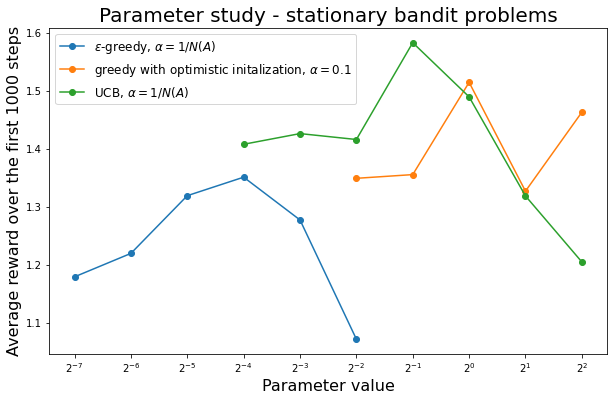

In [204]:
num_simulations = 100
num_steps = 1000
num_actions = 10
exploration_probabilities = (1/128, 1/64, 1/32, 1/16, 1/8, 1/4)
eps_greedy_results = [
    np.average(run_multiple_simulations(num_simulations, num_steps, num_actions, True, ep, 0)) for ep in exploration_probabilities
]
inital_action_value_estimates = (1/4, 1/2, 1, 2, 4)
optimistic_initialization_results = [
    np.average(run_multiple_simulations(num_simulations, num_steps, num_actions, True, 0, ie, 0.1)) for ie in inital_action_value_estimates
]
uncertainty_constants = (1/16, 1/8, 1/4, 1/2, 1, 2, 4)
ucb_results = [
    np.average(run_multiple_simulations(num_simulations, num_steps, num_actions, True, None, 0, None, uc)) for uc in uncertainty_constants
]
plt.subplots(figsize=(10, 6))
plt.plot(exploration_probabilities, eps_greedy_results, marker="o", label="$\epsilon$-greedy, $\\alpha = 1/N(A)$")
plt.plot(inital_action_value_estimates, optimistic_initialization_results, marker="o", label="greedy with optimistic initalization, $\\alpha = 0.1$")
plt.plot(uncertainty_constants, ucb_results, marker="o", label="UCB, $\\alpha = 1/N(A)$")
plt.xscale("log", base=2)
plt.xticks((1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4))
plt.legend(fontsize=12)
plt.xlabel("Parameter value", fontsize=16)
plt.ylabel("Average reward over the first 1000 steps", fontsize=16)
plt.title("Parameter study - stationary bandit problems", fontsize=20)

In [ ]:
# TODO: Do Gradient bandit
# TODO: Change to 1000 num_simulations?

# Parameter studies with nonstationary bandit problems